In [1]:
from utils.get_data import *

In [2]:
data_singleton = get_data()

In [3]:
data_singleton.get_data('India')

,NH3,NO2,CO,PM2.5,Temp,Pressure,Humidity,O3,Date
0,0.60,0.16,4.01,0.00,33.53,948.26,51.98,7.37,2020-11-17 11:20:53.407872
1,0.62,0.15,4.13,0.39,33.50,948.18,51.53,9.06,2020-11-17 11:22:41.214724
2,0.69,0.14,4.45,0.39,33.36,948.15,50.50,16.47,2020-11-17 11:24:28.546567
3,0.70,0.14,4.52,0.38,32.18,948.14,53.35,9.80,2020-11-17 11:26:16.884289
4,0.72,0.14,4.56,0.40,31.77,948.08,53.70,17.28,2020-11-17 11:28:19.820781
...,...,...,...,...,...,...,...,...,...
173460,0.49,0.18,3.28,0.00,26.19,930.53,83.68,5.10,2022-07-14 06:36:51.411260
173461,0.48,0.18,3.28,0.00,26.15,930.53,83.53,5.18,2022-07-14 06:37:48.752963
173462,0.47,0.18,3.28,0.00,26.15,930.53,83.76,5.18,2022-07-14 06:38:45.008995
173463,0.48,0.18,3.28,0.00,26.16,930.49,83.78,5.18,2022-07-14 06:39:42.306449


In [4]:
import importlib
import utils.helper_functions
importlib.reload(utils.helper_functions)
from utils.helper_functions import *

In [5]:
india_df = data_singleton.get_data('India')
df_daily = resample_time_series(india_df, freq='D')
df_daily

,Date,NH3,NO2,CO,PM2.5,Temp,Pressure,Humidity,O3
0,2020-11-17,0.911429,0.129286,5.322143,0.366429,31.672143,947.968571,54.468571,16.218571
1,2020-11-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-11-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-11-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-11-21,0.894242,0.124242,5.304545,0.000000,31.090303,947.773333,59.650303,17.656970
...,...,...,...,...,...,...,...,...,...
600,2022-07-10,0.432716,0.188553,3.148771,0.000000,27.161223,934.785274,82.285403,5.264296
601,2022-07-11,0.463380,0.183082,3.254246,0.000000,26.837050,936.181938,84.975304,5.562414
602,2022-07-12,0.480939,0.179630,3.324504,0.000000,26.609497,935.793677,85.558173,5.761104
603,2022-07-13,0.464742,0.182295,3.238644,0.000000,26.448075,933.061071,85.739728,5.237533


In [6]:
from utils.plot_functions import plot_time_series_heatmap

plot_time_series_heatmap(df_daily).show()

In [7]:
from utils.missingness import *

In [8]:
res_df = reconstruct_time_index(df_daily)
gaps = compute_gap_stats(res_df)
gaps

,feature,num_gaps,mean_gap,max_gap
0,NH3,17,23.000000,136
1,NO2,17,23.000000,136
2,CO,17,23.000000,136
3,PM2.5,17,23.000000,136
4,Temp,18,22.055556,136
5,Pressure,18,22.055556,136
6,Humidity,18,22.055556,136
7,O3,17,23.000000,136


In [9]:
importlib.reload(utils.plot_functions)
import utils.co_coverage
from utils.plot_functions import *
importlib.reload(utils.co_coverage)
from utils.plot_functions import *

In [10]:
plot_temporal_coverage_heatmap(data_singleton.get_data('India')).show()

In [11]:
plot_temporal_coverage_heatmap(data_singleton.get_data('Sweden Bedroom')).show()

In [15]:
def calculate_and_draw_combined_co_coverage_parcoords(data_singleton, start_date, end_date):
    """
    Calculate the co-coverage matrix for pollutants across all datasets using daily bins
    and visualize them in a single parallel coordinates plot with enhanced visibility.

    Args:
        data_singleton: The DataSingleton object containing datasets.
        start_date (str): Start date of the time range (e.g., '2019-02-06').
        end_date (str): End date of the time range (e.g., '2019-11-19').

    Returns:
        None: Displays the parallel coordinates plot.
    """
    pollutants = ['PM_MET_IN1', 'CO2_ETC_IN1', 'NO2_AQL_IN1', 'T_ETC_IN1', 'RH_ETC_IN1', 'FRM_ADJ_IN1']
    
    daily_bins = pd.date_range(start=start_date, end=end_date, freq='D')

    dataset_lines = []
    dataset_names = []

    for dataset_name in data_singleton._data_store:
        dataset = data_singleton.get_data(dataset_name)
        dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')
        filtered_data = dataset[(dataset['Date'] >= start_date) & (dataset['Date'] <= end_date)]

        available_columns = [col for col in pollutants if col in filtered_data.columns]
        if len(available_columns) < 2:
            print(f"Skipping {dataset_name}: Insufficient pollutant columns.")
            continue

        filtered_data['bin'] = pd.cut(filtered_data['Date'], bins=daily_bins, labels=daily_bins[:-1])

        daily_presence = pd.DataFrame(
            0, index=daily_bins[:-1], columns=available_columns
        )

        for col in available_columns:
            daily_presence[col] = filtered_data.groupby('bin', observed=False)[col].apply(lambda x: x.notna().any()).astype(int)

        co_coverage_matrix = pd.DataFrame(
            np.zeros((len(available_columns), len(available_columns))),
            index=available_columns, columns=available_columns
        )

        T = len(daily_bins) - 1
        for i, col_i in enumerate(available_columns):
            for j, col_j in enumerate(available_columns):
                co_coverage_matrix.iloc[i, j] = (
                    (daily_presence[col_i] & daily_presence[col_j]).sum() / T
                )

        avg_co_coverage = co_coverage_matrix.mean(axis=1).values
        dataset_lines.append(avg_co_coverage)
        dataset_names.append(dataset_name)

    # Ensure all pollutant dimensions are labeled properly
    dimensions = []
    for i, pollutant in enumerate(pollutants):
        values = [line[i] if i < len(line) else 0 for line in dataset_lines]
        dimensions.append(
            dict(
                label=pollutant,
                values=values,
                range=[0, 0.0142],
                tickvals=np.linspace(0, 0.0142, 5),  # Ensure axis ticks are visible
            )
        )

    # Create the parallel coordinates plot
    fig = go.Figure(
        data=go.Parcoords(
            line=dict(
                color=np.arange(len(dataset_lines)), 
                colorscale="Turbo",  # Vibrant color scheme
                cmin=0, 
                cmax=len(dataset_lines),
                showscale=False  # Hide color scale
            ),
            dimensions=dimensions,
        )
    )

    # Adjust layout for better readability
    fig.update_layout(
        height=250,  # Smaller height
        margin=dict(l=50, r=50, t=40, b=40),  # Adjusted top margin for labels
    )

    fig.show()
start_date = '2016-07-12'
end_date = '2018-04-09'
calculate_and_draw_combined_co_coverage_parcoords(data_singleton, start_date, end_date)

Skipping India: Insufficient pollutant columns.
Skipping Mexico: Insufficient pollutant columns.
Skipping Sweden Bedroom: Insufficient pollutant columns.
Skipping Sweden Livingroom: Insufficient pollutant columns.


/tmp/ipykernel_2463978/3147986951.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Skipping Caliapt0: Insufficient pollutant columns.
Skipping Caliapt1: Insufficient pollutant columns.
Skipping Caliapt2: Insufficient pollutant columns.
Skipping Caliapt3: Insufficient pollutant columns.
Skipping Caliapt4: Insufficient pollutant columns.
Skipping Caliapt5: Insufficient pollutant columns.
Skipping Caliapt6: Insufficient pollutant columns.
Skipping Caliapt7: Insufficient pollutant columns.
Skipping Caliapt8: Insufficient pollutant columns.
Skipping Caliapt9: Insufficient pollutant columns.
Skipping Caliapt10: Insufficient pollutant columns.
Skipping Caliapt11: Insufficient pollutant columns.
Skipping Caliapt12: Insufficient pollutant columns.
Skipping Caliapt13: Insufficient pollutant columns.
Skipping Caliapt14: Insufficient pollutant columns.
Skipping Caliapt15: Insufficient pollutant columns.
Skipping Caliapt16: Insufficient pollutant columns.
Skipping Caliapt17: Insufficient pollutant columns.
Skipping Caliapt18: Insufficient pollutant columns.
Skipping Caliapt19: In

In [16]:
from utils.summary import *

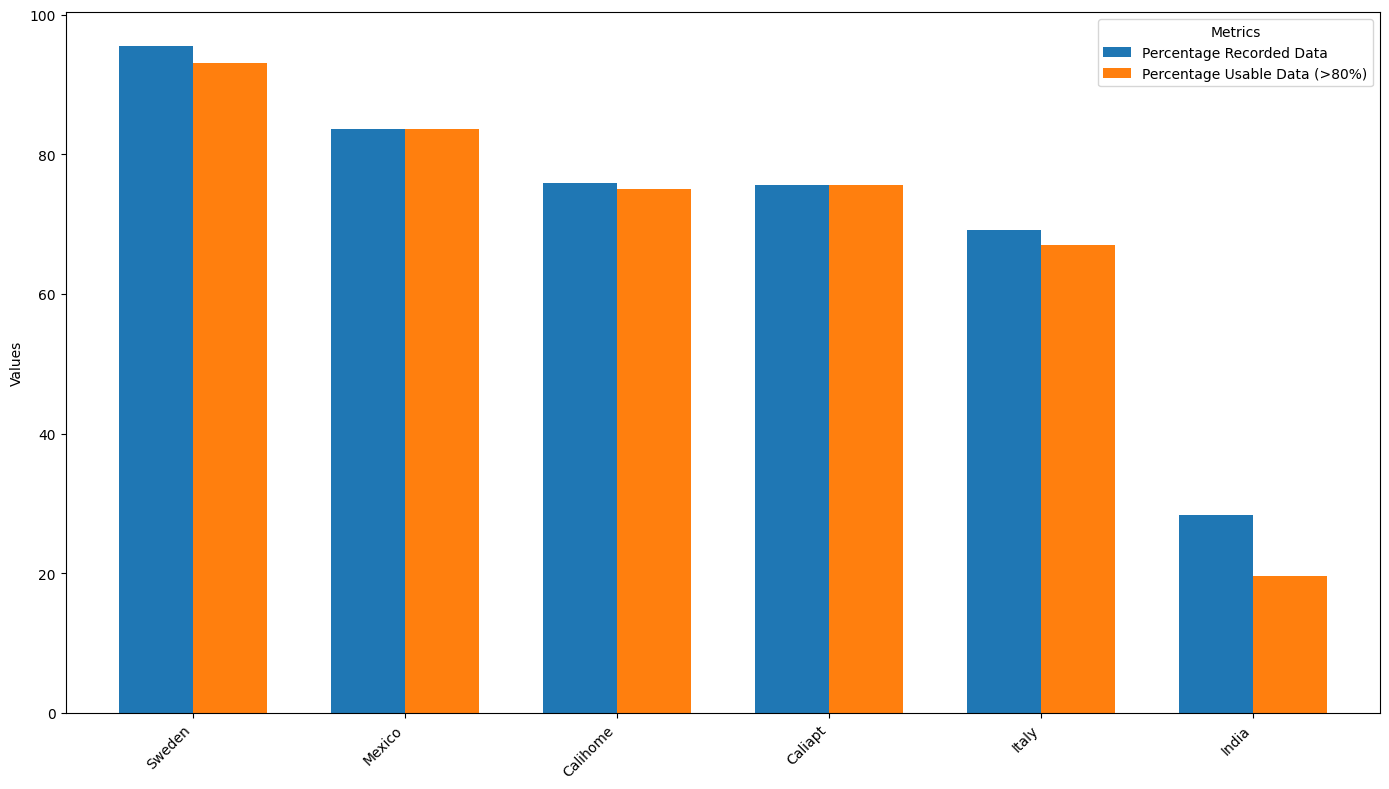


Debugging Sweden Bedroom:
Total Expected Bins (All Days): 1373
Recorded Bins (>=12 hours/day): 1308
Usable Bins (>80% data): 1277
Total Records: 249291
Missing Records: 0
Completeness Ratio: 100.00%
Time Span Covered (Days): 1371
Sample of Daily Bin Counts:
Date
2020-12-25    24
2020-02-25    24
2022-09-08    24
2022-11-20    24
2020-03-26    24
2021-07-21    24
2022-11-25    24
2021-09-02    24
2022-08-09    24
2022-01-09    24
dtype: int64

Debugging Sweden Livingroom:
Total Expected Bins (All Days): 1372
Recorded Bins (>=12 hours/day): 1315
Usable Bins (>80% data): 1278
Total Records: 249381
Missing Records: 0
Completeness Ratio: 100.00%
Time Span Covered (Days): 1370
Sample of Daily Bin Counts:
Date
2020-09-06    24
2019-12-16    24
2020-11-01    24
2022-07-20    24
2022-11-20    24
2022-08-01    24
2022-07-18    24
2022-05-13    24
2022-07-24    24
2021-05-20    24
dtype: int64


In [17]:
import matplotlib.pyplot as plt
def plot_stats_df(stats_df):
    """
    Generate a grouped bar plot for dataset statistics, excluding record-related attributes.
    
    Args:
        stats_df (pd.DataFrame): The statistics DataFrame containing computed metrics.
    """
    # Exclude record-related attributes
    # stats_df_filtered = stats_df.drop(columns=['Total Records', 'Missing Records', 'Completeness Ratio'], errors='ignore')
    stats_df_filtered = stats_df[['Percentage Recorded Data','Percentage Usable Data (>80%)']]
    stats_df_filtered = stats_df_filtered.sort_values(by='Percentage Recorded Data', ascending=False)
    fig, ax = plt.subplots(figsize=(14, 8))
    stats_df_filtered.plot(kind='bar', ax=ax, width=0.7)
    
    ax.set_ylabel("Values")
    # ax.set_title("Dataset Statistics (Excluding Record-Related Attributes)")
    ax.legend(title="Metrics")
    ax.set_xticklabels(stats_df_filtered.index, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()


stats_df = calculate_comprehensive_statistics(data_singleton)
plot_stats_df(stats_df)
stats_df = calculate_comprehensive_statistics(data_singleton, debug=True)
